In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import  DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


In [ ]:
# Load the customer data
df = pd.read_csv('/Users/hussamalmutairi/Desktop/MA_DS/data_FT/bi_products_all.csv')


## Sand box

in this section trying different approches to define the best model to be used 

In [ ]:
df.columns

Index(['Unnamed: 0', 'pk_cid', 'pk_partition', 'short_term_deposit', 'loans',
       'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'year',
       'quarter', 'entry_date', 'entry_channel', 'region_code', 'segment',
       'gender', 'salary_m', 'income_groups', 'age_groups',
       'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'rev_accounts_products',
       'rev_savings_and_investment_products', 'rev_financing_products',
       'total revenue', 'Qs'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0','salary_m', 'income_groups','Qs'],inplace=True)

In [ ]:
df.isnull().sum()

pk_cid                                      0
pk_partition                                0
short_term_deposit                          0
loans                                       0
mortgage                                    0
funds                                       0
securities                                  0
long_term_deposit                           0
em_account_pp                               0
credit_card                                 0
payroll                                     0
pension_plan                                0
payroll_account                             0
emc_account                                 0
debit_card                                  0
em_account_p                                0
em_acount                                   0
year                                        0
quarter                                     0
entry_date                                  0
entry_channel                            1689
region_code                       

In [ ]:
df['entry_channel'] = df.groupby('pk_cid')['entry_channel'].apply(lambda x: x.ffill())


In [ ]:
#df['entry_channel'] = df.groupby('pk_cid')['entry_channel'].apply(lambda x: x.bfill())


In [ ]:
#df['region_code'] = df.groupby('pk_cid')['region_code'].apply(lambda x: x.ffill())

In [ ]:
#df['region_code'] = df.groupby('pk_cid')['region_code'].apply(lambda x: x.bfill())

In [ ]:
#df['segment'] = df.groupby('pk_cid')['segment'].apply(lambda x: x.ffill())
#df['segment'] = df.groupby('pk_cid')['segment'].apply(lambda x: x.bfill())

In [ ]:
# Create new columns for repurchase information
df['repurchase_accounts_products'] = 0
df['repurchase_savings_and_investment_products'] = 0
df['repurchase_financing_products'] = 0

# Loop over each customer ID (pk_cid)
for cid in df['pk_cid'].unique():
    # Get rows for current customer
    rows = df.loc[df['pk_cid'] == cid]
    # Check if customer made a purchase in 2018 and 2019 for each product type
    if 'accounts_products' in rows.columns:
        if (rows['accounts_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'accounts_products'].eq(1).any()):
            df.loc[(df['pk_cid'] == cid), 'repurchase_accounts_products'] = 1
    if 'savings_and_investment_products' in rows.columns:
        if (rows['savings_and_investment_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'savings_and_investment_products'].eq(1).any()):
            df.loc[(df['pk_cid'] == cid), 'repurchase_savings_and_investment_products'] = 1
    if 'financing_products' in rows.columns:
        if (rows['financing_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'financing_products'].eq(1).any()):
            df.loc[(df['pk_cid'] == cid), 'repurchase_financing_products'] = 1


In [ ]:
# Create new column for customer type
df['customer_type'] = 'new'

# Loop over each customer ID (pk_cid)
for cid in df['pk_cid'].unique():
    # Get rows for current customer
    rows = df.loc[df['pk_cid'] == cid]
    
    # Check if customer has a row in 2019
    if rows.loc[rows['year'] == 2019].shape[0] > 0:
        # If customer has a row in 2019, set customer type to 'continuing'
        df.loc[(df['pk_cid'] == cid) & (df['year'] == 2019), 'customer_type'] = 'continuing'
    else:
        # Check if customer has a row in 2018
        if rows.loc[rows['year'] == 2018].shape[0] > 0:
            # If customer has a row in 2018, set customer type to 'lost'
            df.loc[(df['pk_cid'] == cid), 'customer_type'] = 'lost'




KeyboardInterrupt: 

In [ ]:
df['customer_type'].value_counts()

lost          355053
continuing     94818
Name: customer_type, dtype: int64

In [ ]:
# Create new column for customer type
df['customer_type'] = 'new'
# Loop over each customer ID (pk_cid)
for cid in df['pk_cid'].unique():
    # Get rows for current customer
    rows = df.loc[df['pk_cid'] == cid]
    # Check if customer has a row in 2019
    if rows.loc[rows['year'] == 2019].shape[0] > 0:
        # If customer has a row in 2019, set customer type to 'continuing'
        df.loc[(df['pk_cid'] == cid), 'customer_type'] = 'continuing'
    else:
        # If customer doesn't have a row in 2019, set customer type to 'lost'
        df.loc[(df['pk_cid'] == cid), 'customer_type'] = 'lost'


In [ ]:
backup= df.copy()

In [ ]:
df.sort_values(by='pk_partition').drop_duplicates(subset='pk_cid', keep='first',inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
X.columns

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_date', 'entry_channel',
       'region_code', 'segment', 'gender', 'age_groups', 'accounts_products',
       'savings_and_investment_products', 'financing_products',
       'first_purchase_indays', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type'],
      dtype='object')

In [ ]:
df.isnull().sum()

pk_cid                                        0
pk_partition                                  0
short_term_deposit                            0
loans                                         0
mortgage                                      0
funds                                         0
securities                                    0
long_term_deposit                             0
em_account_pp                                 0
credit_card                                   0
payroll                                       0
pension_plan                                  0
payroll_account                               0
emc_account                                   0
debit_card                                    0
em_account_p                                  0
em_acount                                     0
year                                          0
quarter                                       0
entry_date                                    0
entry_channel                           

In [ ]:
df.set_index('pk_cid',inplace=True)

# preparing the data 

In [ ]:
top5 = df['entry_channel'].value_counts().nlargest(5).index
df['entry_channel'] = df['entry_channel'].apply(lambda x: x if x in top5 else 'other')


In [ ]:
df = pd.get_dummies(df, columns=['segment', 'gender', 'age_groups', 'entry_channel'], prefix=['seg_', 'gender_', 'age_','entry_channel_'])


In [ ]:
df = pd.get_dummies(df, columns=['customer_type'], prefix=['customer_type_'])


In [ ]:
df['first_purchase_indays'] = df['first_purchase_indays'].str.extract('(\d+)', expand=False)

In [ ]:
df['first_purchase_indays'].sort_values()

pk_cid
1548000      0
1492245      0
1492248      0
1492251      0
1492252      0
          ... 
1115539    999
1014639    999
1109180    999
1153676    999
998859     999
Name: first_purchase_indays, Length: 284971, dtype: object

In [ ]:
df['first_purchase_indays'] = pd.to_numeric(df['first_purchase_indays'], errors='coerce')
df.loc[df['first_purchase_indays'] < 0, 'first_purchase_indays'] = 0


In [ ]:
X.columns

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'region_code', 'accounts_products',
       'savings_and_investment_products', 'financing_products',
       'first_purchase_indays', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type', 'seg__01 - TOP',
       'seg__02 - PARTICULARES', 'seg__03 - UNIVERSITARIO', 'gender__H',
       'gender__V', 'age__Middle_aged Adults', 'age__Minor',
       'age__Old_aged Adults', 'age__Young adult', 'entry_channel__KAT',
       'entry_channel__KFC', 'entry_channel__KHE', 'entry_channel__KHM',
       'entry_channel__KHQ', 'entry_channel__other'],
      dtype='object')

In [ ]:
# Preprocess the data
X = df.drop(columns=[ 'pk_partition','rev_accounts_products',
'rev_savings_and_investment_products',
'rev_financing_products',
'total revenue','year',
'quarter','entry_date'
 ])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Determine optimal number of clusters
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
optimal_n_clusters = np.argmax(sil_scores) + 2

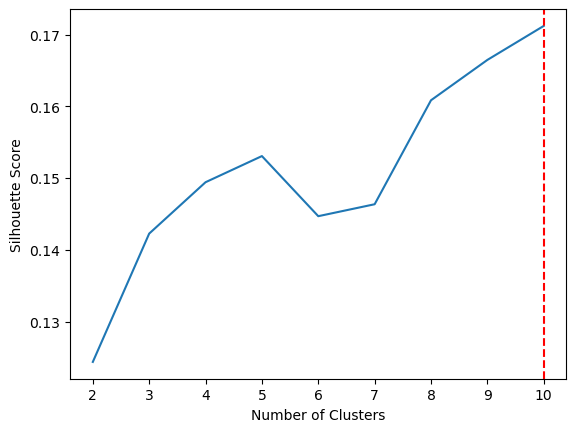

In [ ]:


# Plot the silhouette scores
plt.plot(range(2, 11), sil_scores)

# Label the axes
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a vertical line at the optimal number of clusters
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--')

# Show the plot
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
labels = kmeans.fit_predict(X_scaled)

In this attempt all values are low, which mean its difficult to the model to find the right number of clusters 

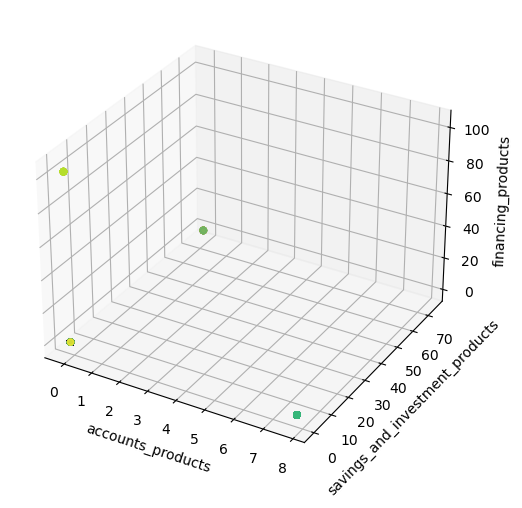

In [ ]:
# Visualize the clusters
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels)
ax.set_xlabel('accounts_products')
ax.set_ylabel('savings_and_investment_products')
ax.set_zlabel('financing_products')
plt.show()


In [ ]:
# Preprocess the data
X = df.drop(columns=[ 'pk_partition','rev_accounts_products',
'rev_savings_and_investment_products',
'rev_financing_products',
'total revenue','year',
'quarter','entry_date','short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount',
 ])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determine optimal number of clusters
sil_scores2 = []
for n_clusters in range(5,9):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    sil_scores2.append(silhouette_score(X_scaled, kmeans.labels_))
    print("done")
optimal_n_clusters2 = np.argmax(sil_scores2) + 2

done
done
done
done


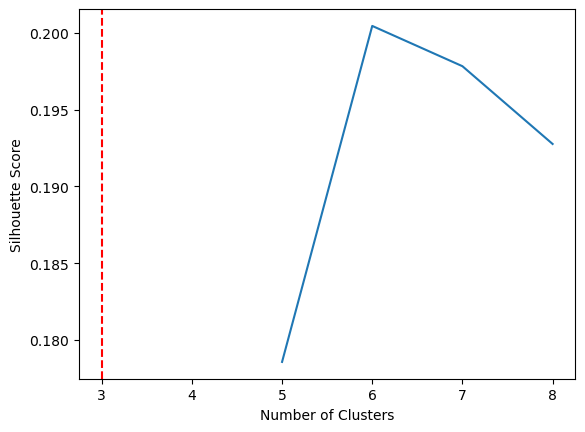

In [ ]:

# Plot the silhouette scores
plt.plot(range(5,9), sil_scores2)

# Label the axes
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a vertical line at the optimal number of clusters
plt.axvline(x=optimal_n_clusters2, color='r', linestyle='--')

# Show the plot
plt.show()

Best value is with 6 clusters, stlill the overall values are low  

In [ ]:
kmeans = KMeans(n_clusters=optimal_n_clusters2)
kmeans.fit(X_scaled)

# Get absolute feature importance for each cluster
cluster_importance = np.abs(kmeans.cluster_centers_)

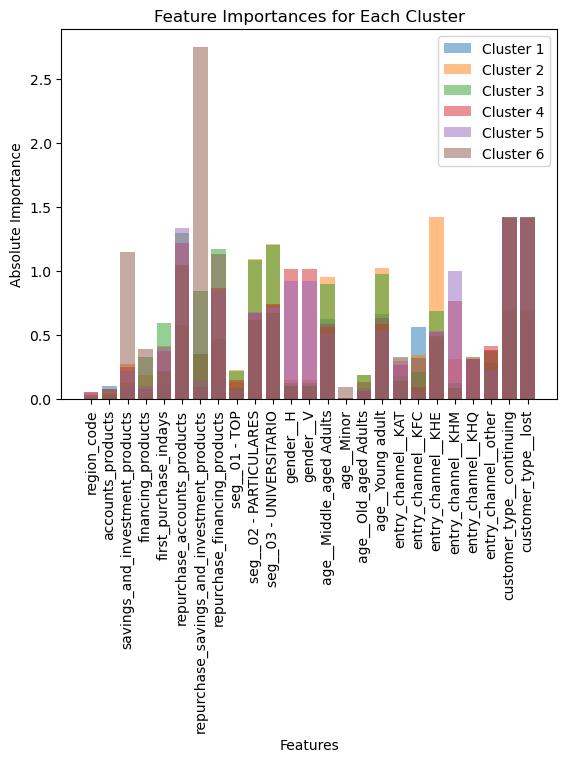

In [ ]:
import matplotlib.pyplot as plt
# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X.shape[1])
for i in range(6):
    ax.bar(x_pos, cluster_importance[i], alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos)
ax.set_xticklabels(X.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()

In [ ]:
# Preprocess the data
X = df.drop(columns=[ 'pk_partition','rev_accounts_products',
'rev_savings_and_investment_products',
'rev_financing_products',
'total revenue','year',
'quarter','entry_date','short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount',
 ])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determine optimal number of clusters
sil_scores3 = []
for n_clusters in range(5,9):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, max_iter=100)
    kmeans.fit(X_scaled)
    sil_scores3.append(silhouette_score(X_scaled, kmeans.labels_))
    print("done")
optimal_n_clusters3 = np.argmax(sil_scores2) + 2

done
done
done
done


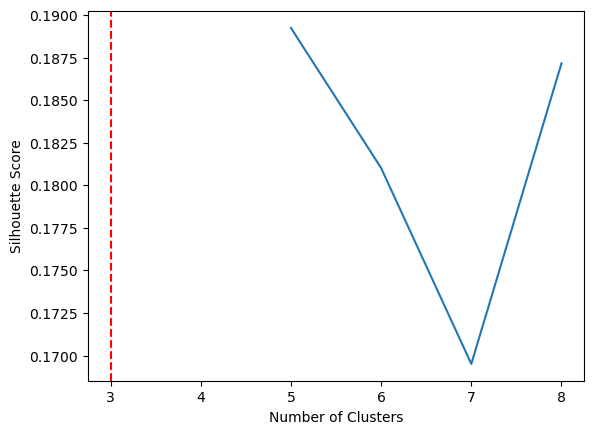

In [ ]:

# Plot the silhouette scores
plt.plot(range(5,9), sil_scores3)

# Label the axes
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a vertical line at the optimal number of clusters
plt.axvline(x=optimal_n_clusters3, color='r', linestyle='--')

# Show the plot
plt.show()

all culsters have really low values :(

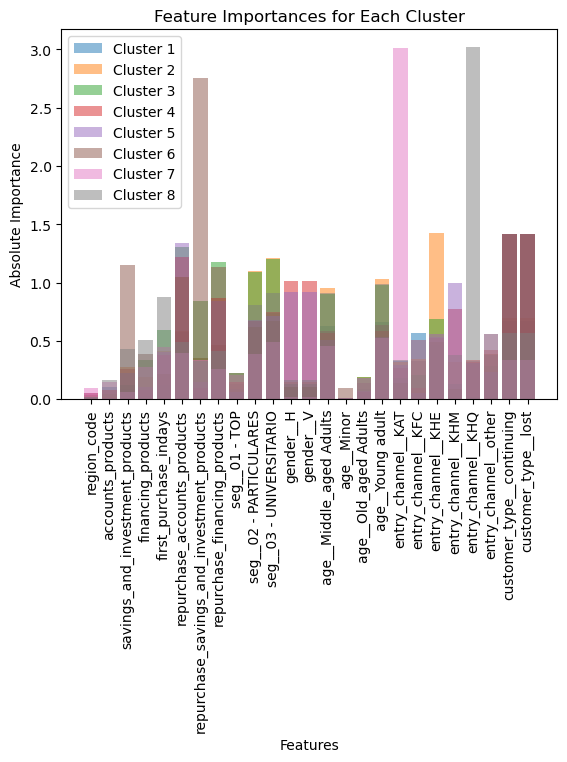

In [ ]:
# Get absolute feature importance for each cluster
kmeans = MiniBatchKMeans(n_clusters=8, batch_size=100, max_iter=100)
kmeans.fit(X_scaled)
cluster_importance = np.abs(kmeans.cluster_centers_)

# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X.shape[1])
for i in range(8):
    ax.bar(x_pos, cluster_importance[i], alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos)
ax.set_xticklabels(X.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()

based on the differnt clusters we see the most important features

In [ ]:
df2= backup.copy()

In [ ]:
df2.set_index('pk_cid',inplace=True)

In [ ]:
df2['segment'].value_counts()

1.0    247254
2.0    154880
3.0     11780
Name: segment, dtype: int64

In [ ]:
df2['segment'].replace({'03 - UNIVERSITARIO':1,'02 - PARTICULARES':2,'01 - TOP':3 }, inplace=True)

In [ ]:
df2['age_groups'].value_counts()

Young adult           273231
Middle_aged Adults    165258
Old_aged Adults        11335
Minor                     47
Name: age_groups, dtype: int64

In [ ]:
#df2['age_groups'].replace({'Minor':0,'Young adult':1,'Middle_aged Adults':2,'Old_aged Adults':3 }, inplace=True)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
# Create new column for customer type
df2['customer_type'] = 'new'

# Update customer type for customers with entry date after 31.12.2018
df2.loc[df2['entry_date'] > '2018-12-31', 'customer_type'] = 'new'

# Loop over each customer ID (pk_cid)
for cid in df2.loc[df2['entry_date'] <= '2018-12-31', 'pk_cid'].unique():
    # Get rows for current customer
    rows = df2.loc[df2['pk_cid'] == cid]
    # Check if customer has entries in 2018 and 2019
    if rows.loc[rows['year'] == 2018].shape[0] > 0 and rows.loc[rows['year'] == 2019].shape[0] > 0:
        # If customer has entries in both 2018 and 2019, set customer type to 'continuing'
        df2.loc[(df2['pk_cid'] == cid), 'customer_type'] = 'continuing'
    elif rows.loc[rows['year'] == 2018].shape[0] > 0:
        # If customer has only entry in 2018, set customer type to 'lost'
        df2.loc[(df2['pk_cid'] == cid), 'customer_type'] = 'lost'



In [ ]:
df2['customer_type'].value_counts()

lost          350911
continuing     73185
new            25775
Name: customer_type, dtype: int64

In [ ]:
#df2['age_groups'].replace({'Minor':0,'Young adult':1,'Middle_aged Adults':2,'Old_aged Adults':3 }, inplace=True)

In [ ]:
df2.columns

Index(['pk_partition', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'year', 'quarter',
       'entry_date', 'entry_channel', 'region_code', 'segment', 'gender',
       'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'rev_accounts_products',
       'rev_savings_and_investment_products', 'rev_financing_products',
       'total revenue', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type__continuing',
       'customer_type__lost', 'customer_type__new',
       'age_groups__Middle_aged Adults', 'age_groups__Minor',
       'age_groups__Old_aged Adults', 'age_groups__Young adult'],
      dtype='object')

In [ ]:
#backup2=df2.copy()

In [ ]:
#df2=backup2.copy()

In [ ]:
df2 = pd.get_dummies(df2, columns=['customer_type'], prefix=['customer_type_'])


In [ ]:
#df2['age_groups'].replace({0:'Minor',1:'Young adult',2:'Middle_aged Adults',3:'Old_aged Adults' }, inplace=True)

In [ ]:
df2 = pd.get_dummies(df2, columns=['age_groups'], prefix=['age_groups_'])


In [ ]:
df2['segment'].replace({1:'03 - UNIVERSITARIO',2:'02 - PARTICULARES',3:'01 - TOP' }, inplace=True)

In [ ]:
df2 = pd.get_dummies(df2, columns=['segment'], prefix=['segment_'])


In [ ]:
df2['first_purchase_indays'] = df2['first_purchase_indays'].str.extract('(\d+)', expand=False)

In [ ]:
df2['first_purchase_indays'] = pd.to_numeric(df2['first_purchase_indays'], errors='coerce')
df2.loc[df['first_purchase_indays'] < 0, 'first_purchase_indays'] = 0


In [ ]:
# Create new columns for repurchase information
df2['repurchase_accounts_products'] = 0
df2['repurchase_savings_and_investment_products'] = 0
df2['repurchase_financing_products'] = 0

# Loop over each customer ID (pk_cid) in the continuing group
for cid in df2.loc[df2['customer_type__continuing'] == 1, 'pk_cid'].unique():
    # Get rows for current customer
    rows = df2.loc[df2['pk_cid'] == cid]
    # Check if customer made a purchase in 2018 and 2019 for each product type
    if 'accounts_products' in rows.columns:
        if (rows['accounts_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'accounts_products'].eq(1).any()):
            df2.loc[(df2['pk_cid'] == cid), 'repurchase_accounts_products'] = 1
    if 'savings_and_investment_products' in rows.columns:
        if (rows['savings_and_investment_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'savings_and_investment_products'].eq(1).any()):
            df2.loc[(df2['pk_cid'] == cid), 'repurchase_savings_and_investment_products'] = 1
    if 'financing_products' in rows.columns:
        if (rows['financing_products'].eq(1).any()) and (rows.loc[rows['year'] == 2019, 'financing_products'].eq(1).any()):
            df2.loc[(df2['pk_cid'] == cid), 'repurchase_financing_products'] = 1


In [ ]:
df2[df2['entry_date']>'2018-12-31']

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,rev_accounts_products,rev_savings_and_investment_products,rev_financing_products,total revenue,repurchase_accounts_products,repurchase_savings_and_investment_products,repurchase_financing_products,customer_type__continuing,customer_type__lost,customer_type__new
74,1434071,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0,20.0,0,0,0,0,0,1
255,1443538,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0,20.0,0,0,0,0,0,1
486,1439466,2019-01-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,40.0,0,40.0,0,0,0,0,0,1
554,1423375,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,60,70.0,0,0,0,0,0,1
752,1467172,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,40.0,60,120.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55762,1178800,2019-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,40.0,0,60.0,0,0,0,0,0,1
55860,1185013,2019-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,0,10.0,0,0,0,0,0,1
55913,1171168,2019-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,40.0,0,60.0,0,0,0,0,0,1
55948,1164094,2019-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,0,10.0,0,0,0,0,0,1


In [ ]:
df2.set_index('pk_cid',inplace=True)

In [ ]:
df2.columns

Index(['pk_partition', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'year', 'quarter',
       'entry_date', 'entry_channel', 'region_code', 'segment', 'gender',
       'age_groups', 'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'rev_accounts_products',
       'rev_savings_and_investment_products', 'rev_financing_products',
       'total revenue', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type__continuing',
       'customer_type__lost', 'customer_type__new'],
      dtype='object')

In [ ]:
#backup4=df2.copy()

In [ ]:
df2 = df2.drop(df2[(df2['year'] > 2018) & (df2['entry_date'] < '2019-01-01')].index)


In [ ]:
df2

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,rev_accounts_products,rev_savings_and_investment_products,rev_financing_products,total revenue,repurchase_accounts_products,repurchase_savings_and_investment_products,repurchase_financing_products,customer_type__continuing,customer_type__lost,customer_type__new
74,1434071,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0,20.0,0,0,0,0,0,1
255,1443538,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0,20.0,0,0,0,0,0,1
486,1439466,2019-01-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,40.0,0,40.0,0,0,0,0,0,1
554,1423375,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,60,70.0,0,0,0,0,0,1
752,1467172,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,40.0,60,120.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449866,1400657,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,0,10.0,0,1,1,1,0,0
449867,1400669,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,40.0,60,120.0,0,0,0,0,1,0
449868,1400677,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,60,80.0,1,0,1,1,0,0
449869,1400506,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0.0,0,10.0,0,0,0,0,1,0


In [ ]:
df2.set_index('pk_cid', inplace=True)

In [ ]:
df2.columns

Index(['pk_partition', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'year', 'quarter',
       'entry_date', 'entry_channel', 'region_code', 'gender',
       'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'rev_accounts_products',
       'rev_savings_and_investment_products', 'rev_financing_products',
       'total revenue', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type__continuing',
       'customer_type__lost', 'customer_type__new',
       'age_groups__Middle_aged Adults', 'age_groups__Minor',
       'age_groups__Old_aged Adults', 'age_groups__Young adult',
       'segment__01 - TOP', 'segment__02 - PARTICULARES',
       'segment__03 - 

## Final model 

#Feature Selection

In [ ]:
X= df2[['short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount',
       'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type__continuing',
       'customer_type__lost', 'customer_type__new',
       'age_groups__Middle_aged Adults', 'age_groups__Minor',
       'age_groups__Old_aged Adults', 'age_groups__Young adult',
       'segment__01 - TOP', 'segment__02 - PARTICULARES',
       'segment__03 - UNIVERSITARIO']]


In [ ]:
df3= df2[['short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount',
       'accounts_products', 'savings_and_investment_products',
       'financing_products', 'first_purchase_indays', 'repurchase_accounts_products',
       'repurchase_savings_and_investment_products',
       'repurchase_financing_products', 'customer_type__continuing',
       'customer_type__lost', 'customer_type__new',
       'age_groups__Middle_aged Adults', 'age_groups__Minor',
       'age_groups__Old_aged Adults', 'age_groups__Young adult',
       'segment__01 - TOP', 'segment__02 - PARTICULARES',
       'segment__03 - UNIVERSITARIO']]


In [ ]:
X

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,...,customer_type__continuing,customer_type__lost,customer_type__new,age_groups__Middle_aged Adults,age_groups__Minor,age_groups__Old_aged Adults,age_groups__Young adult,segment__01 - TOP,segment__02 - PARTICULARES,segment__03 - UNIVERSITARIO
pk_cid,,,,,,,,,,,,,,,,,,,,,
1434071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1443538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
1439466,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
1423375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1467172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
1400669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
1400677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
X['first_purchase_indays'].fillna(-1, inplace=True)

/var/folders/92/5m7b39tj1j5g7s50bvjdxglc0000gp/T/ipykernel_83197/2681118345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['first_purchase_indays'].fillna(-1, inplace=True)


In [ ]:
X.dropna(inplace=True)

/var/folders/92/5m7b39tj1j5g7s50bvjdxglc0000gp/T/ipykernel_83197/490656300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
df3= X.copy()

to reduce number of features before training our models. We used PCA technique for features reduction process. First, we created a Scree plot to help us to select the best number of components for PCA.

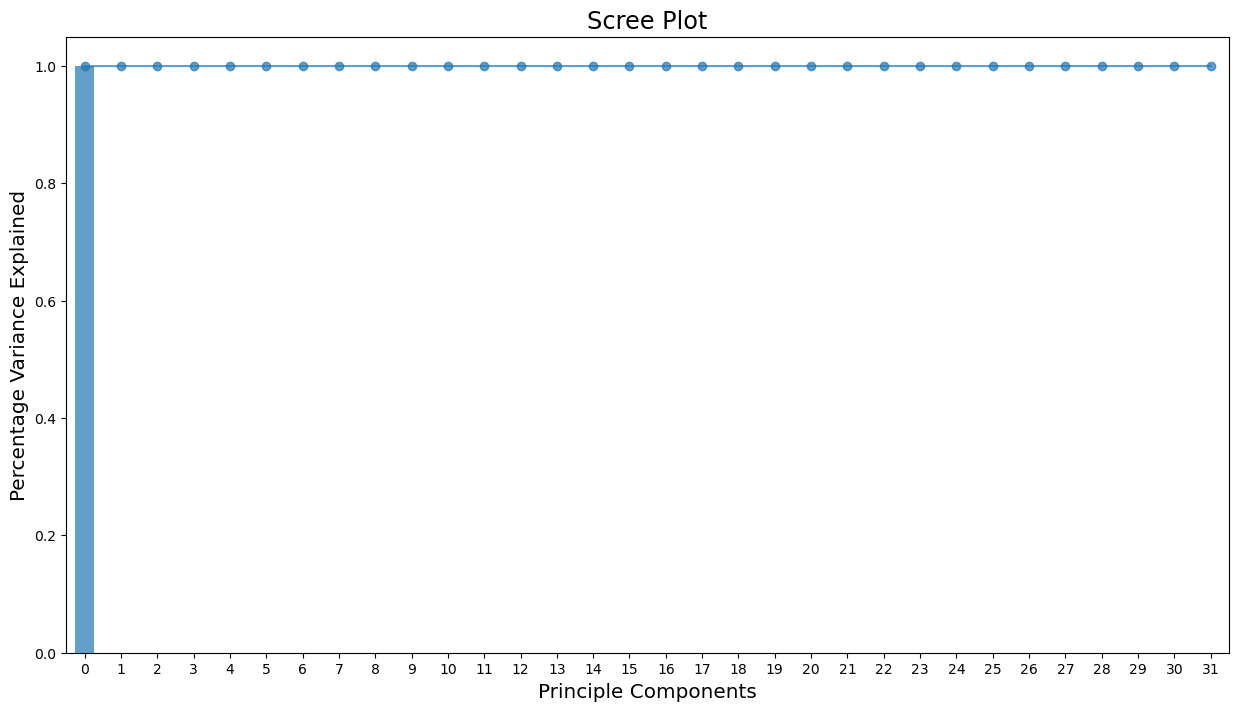

In [ ]:
pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

PCA didn't work :D 

In [ ]:
# create PCA with 6 components
#pca = PCA(n_components=4)
# X = pca.fit_transform(X)

checking elbow method 

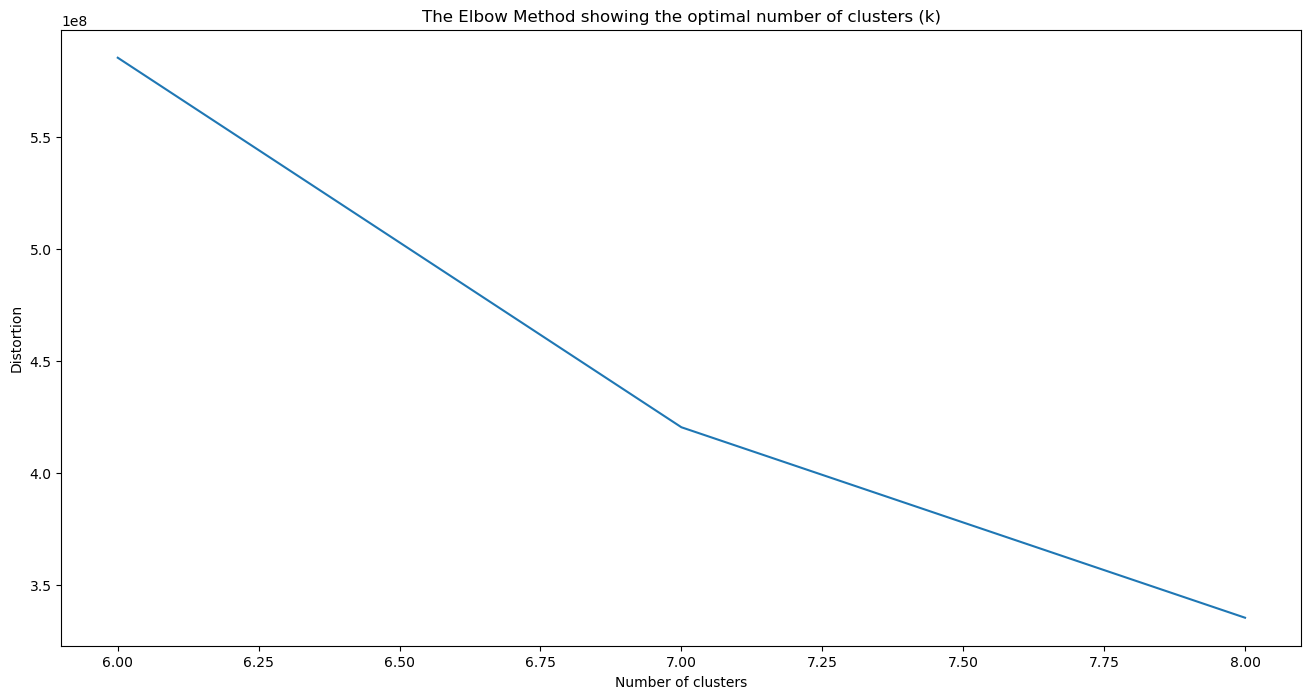

In [ ]:
w = []
K = range(6,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

elbow= 7

finding optimal K with silhouette_score

In [ ]:
# Determine optimal number of clusters
sil_scores = []
for n_clusters in range(6,9):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))
optimal_n_clusters = np.argmax(sil_scores) + 2

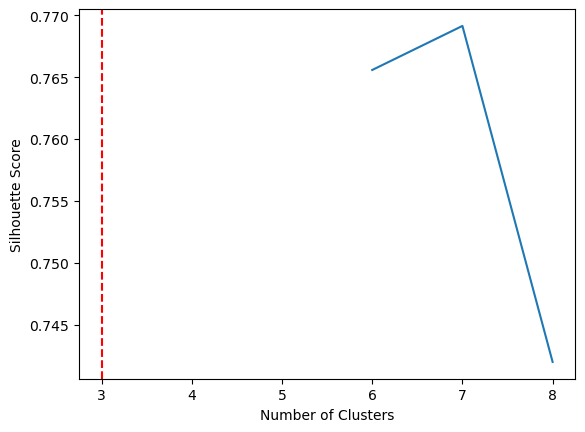

In [ ]:
# Plot the silhouette scores
plt.plot(range(6,9), sil_scores)

# Label the axes
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a vertical line at the optimal number of clusters
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--')

# Show the plot
plt.show()

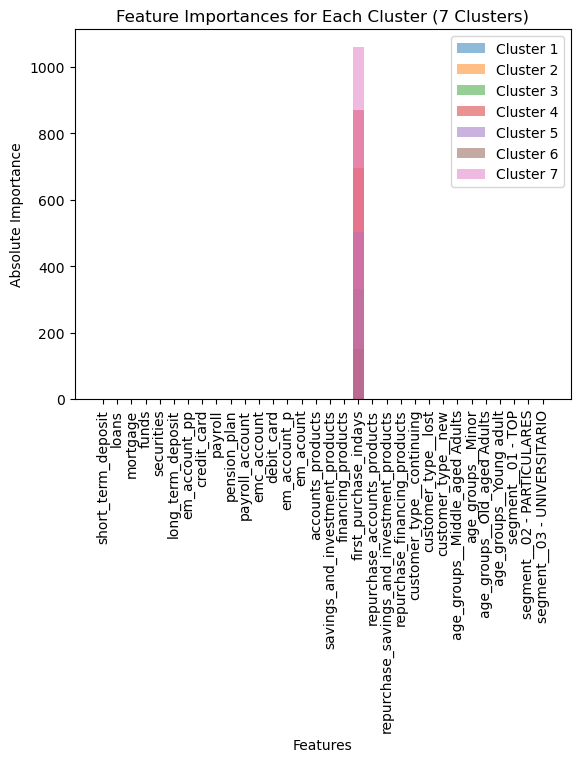

In [ ]:

# Get feature importance for each cluster
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
cluster_importance = np.abs(kmeans.cluster_centers_)

# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X.shape[1])
for i in range(7):
    ax.bar(x_pos, cluster_importance[i], alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos)
ax.set_xticklabels(X.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster (7 Clusters)')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()



In [ ]:
X1= X.drop('first_purchase_indays',axis=1)

In [ ]:
df4=X1.copy()

In [ ]:

# Apply KMeans 
kmean = KMeans(n_clusters=7)

kmean.fit(X1)
y_pred = kmean.predict(X1)
df4['pred_cluster']=y_pred

In [ ]:
X

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,...,customer_type__continuing,customer_type__lost,customer_type__new,age_groups__Middle_aged Adults,age_groups__Minor,age_groups__Old_aged Adults,age_groups__Young adult,segment__01 - TOP,segment__02 - PARTICULARES,segment__03 - UNIVERSITARIO
pk_cid,,,,,,,,,,,,,,,,,,,,,
1434071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1443538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
1439466,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
1423375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1467172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
1400669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
1400677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df4['pred_cluster'].value_counts()

1    208753
0     98205
5     28250
2     24129
4     23486
6     17279
3     15440
Name: pred_cluster, dtype: int64

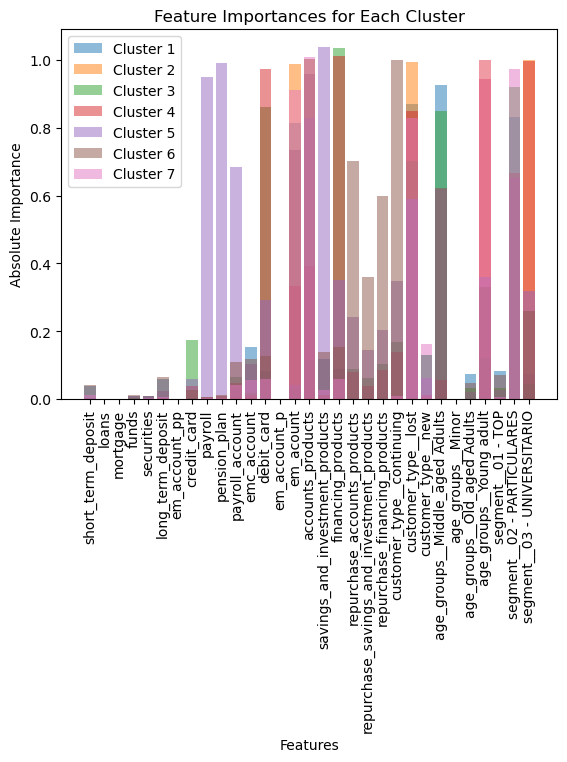

In [ ]:


# Get feature importance for each cluster
cluster_importance = np.abs(kmean.cluster_centers_)

# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X1.shape[1])
for i in range(7):
    ax.bar(x_pos, cluster_importance[i], alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos)
ax.set_xticklabels(X1.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()

In [ ]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X1)
sil_score = silhouette_score(X1, kmeans.labels_)

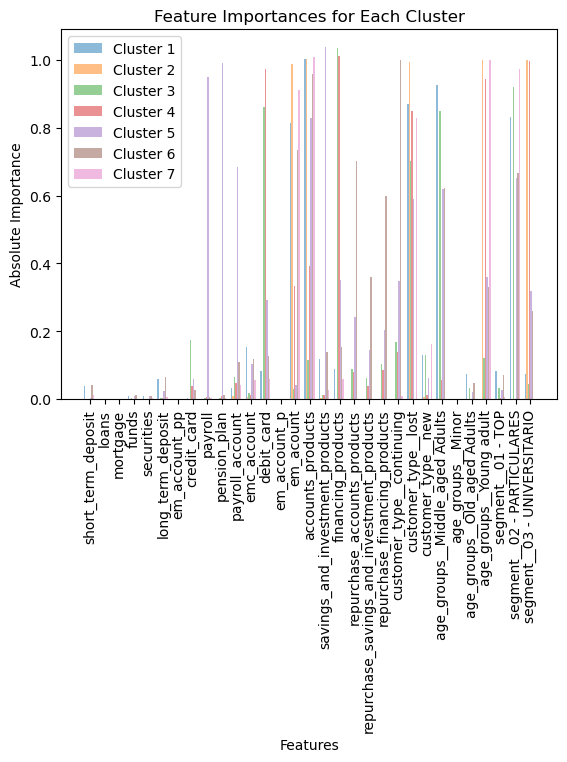

In [ ]:
# Get feature importance for each cluster
cluster_importance = np.abs(kmean.cluster_centers_)

# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X1.shape[1])
bar_width = 0.1
for i in range(7):
    ax.bar(x_pos + i * bar_width, cluster_importance[i], width=bar_width, alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos + (7 / 2) * bar_width)
ax.set_xticklabels(X1.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()


In [ ]:
# Determine optimal number of clusters
sil_scores = []
for n_clusters in range(5,9):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X1)
    sil_scores.append(silhouette_score(X1, kmeans.labels_))
optimal_n_clusters = np.argmax(sil_scores) + 2

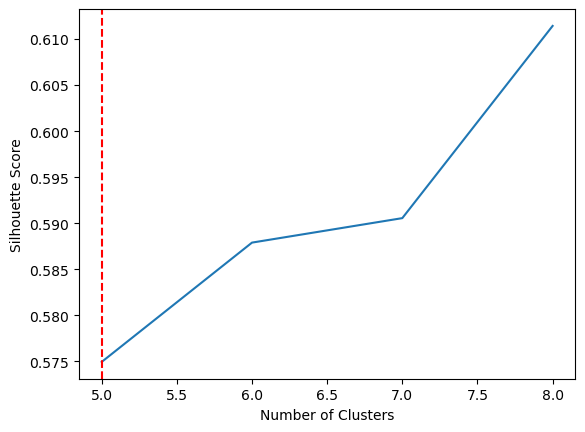

In [ ]:
# Plot the silhouette scores
plt.plot(range(5,9), sil_scores)

# Label the axes
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a vertical line at the optimal number of clusters
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--')

# Show the plot
plt.show()

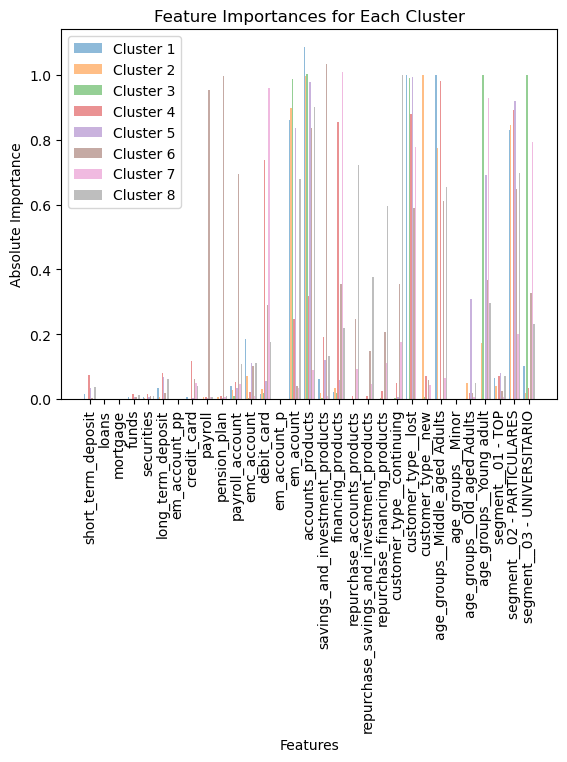

In [ ]:
# Get feature importance for each cluster
cluster_importance = np.abs(kmean.cluster_centers_)

# Plot feature importances for each cluster
fig, ax = plt.subplots()
x_pos = np.arange(X1.shape[1])
bar_width = 0.1
for i in range(8):
    ax.bar(x_pos + i * bar_width, cluster_importance[i], width=bar_width, alpha=0.5, label=f'Cluster {i+1}')
ax.set_xticks(x_pos + (7 / 2) * bar_width)
ax.set_xticklabels(X1.columns, rotation='vertical')
ax.set_title('Feature Importances for Each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Importance')
ax.legend()
plt.show()

In [ ]:

# Apply KMeans 
kmean = KMeans(n_clusters=8)

kmean.fit(X1)
y_pred = kmean.predict(X1)
df4['pred_cluster']=y_pred

In [ ]:
df4['pred_cluster'].value_counts()

2    213104
0     66924
3     30940
7     29757
5     23115
4     20969
1     16258
6     14475
Name: pred_cluster, dtype: int64

In [ ]:
analysis= df4.groupby('pred_cluster').describe().T
analysis.to_csv('/Users/hussamalmutairi/Desktop/MA_DS/data_FT/CL_analysis3.csv')


Cluster 1: Customers who are mostly lost (99.97%) and middle-aged adults (100%). Their primary account is the electronic account (86.11%) and payroll account (3.94%). They hold higher than average long-term deposits (3.4%) and are more likely to be in the top segment (6.6%) or individual customers (83.1%).

Cluster 2: Customers who are mostly new (100%) and middle-aged adults (77.6%). They have high usage of electronic accounts (89.7%) and are likely to be individual customers (84.5%). They have a higher payroll account usage (2.7%) and are less likely to hold a mortgage (0.006%).

Cluster 3: Customers who are mostly continuing (99.06%) and young adults (99.99%). They have a high usage of electronic accounts (98.7%) and debit cards (18.7%) but are less likely to hold a mortgage (0%). They hold the highest amount of financing products (1.9%) compared to other clusters.

Cluster 4: Customers who are mostly continuing (95.8%) and middle-aged adults (62.9%). They hold the highest amount of long-term deposits (7.9%) compared to other clusters and are more likely to hold securities (1.5%) and funds (1.5%). They are the most likely to be in the top segment (30.6%).

Cluster 5: Customers who are mostly lost (94.9%) and young adults (61.1%). They have the highest credit card usage (4.2%) compared to other clusters and are more likely to hold payroll accounts (10.4%). They are the least likely to hold a mortgage (0.0001%).

Cluster 6: Customers who are mostly lost (97.7%) and young adults (68.1%). They have high usage of electronic accounts (73.9%) and payroll accounts (10.7%). They hold the highest amount of short-term deposits (27.2%) compared to other clusters.

Cluster 7: Customers who are mostly continuing (97.2%) and young adults (97.9%). They have high usage of electronic accounts (98.1%) and debit cards (11.7%). They are less likely to hold a mortgage (0.006%) and have a lower average of funds (0.1%).

Cluster 8: Customers who are mostly continuing (92.5%) and middle-aged adults (81.2%). They have high usage of electronic accounts (97.3%) and payroll accounts (10.3%). They hold the highest amount of securities (1.9%) compared to other clusters and are more likely to hold a mortgage (0.4%).